# IRELAND MACHINE LEARNING

In [1]:
# importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from cmath import sqrt
import warnings
import matplotlib.pyplot as plt
import datetime
import datetime as dt
import sklearn
#import folium
import warnings
#import pydotplus
import six
import sys
import statistics as st
#import functions as fn
#import cufflinks as cf

#cf.set_config_file(offline=True)

#prof.to_file(output_file='output.html')
sys.modules['sklearn.externals.six'] = six
warnings.filterwarnings('ignore')

# import ML packages
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image 
from pandas.plotting import scatter_matrix
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestRegressor
#from explainerdashboard import RegressionExplainer, ExplainerDashboard

#for interactive analysis
from ipywidgets import interact

%matplotlib inline

# IRELAND

# IRISH Crops Dataset

# Read in df_irishmodels.csv into the df_irishdata frame for linear model

In [3]:
#Reading in Irish Crops dataset from between 2010 to 2020 8 actions 10 crop measurements and 139 crop types
df_irishdata = pd.read_csv('df_irishmodels.csv')
df_irishdata.head()

,Unnamed: 0,Year,country,crop_measurement,crops_type,crops_action,crop_value,import_export_value
0,0,2017,Ireland,ha,Apples,Area harvested,695.0,615.0
1,1,2017,Ireland,ha,Apples,Area harvested,695.0,545.0
2,2,2017,Ireland,ha,Apples,Area harvested,695.0,1985.0
3,3,2017,Ireland,ha,Apples,Area harvested,695.0,14778.0
4,4,2017,Ireland,ha,Apples,Area harvested,695.0,17923.0


# Feature Selection

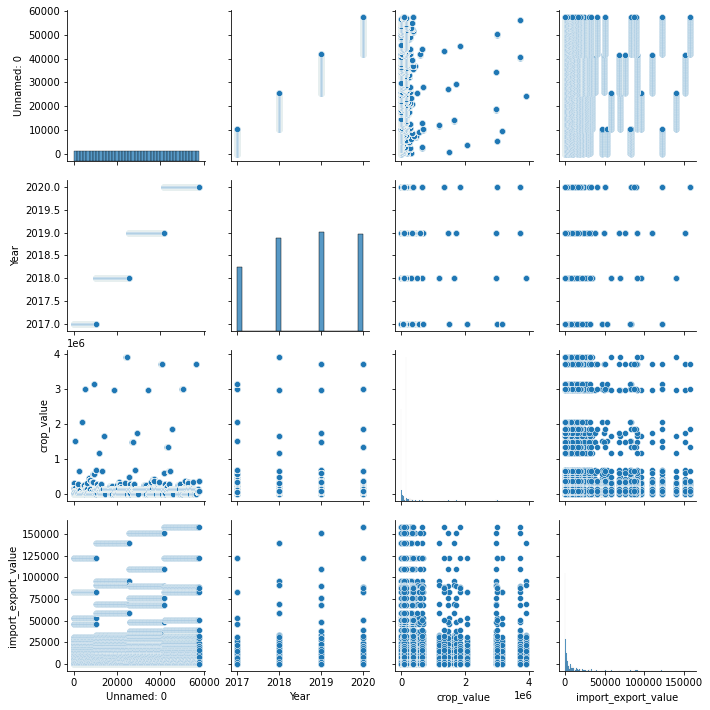

In [4]:
sns.pairplot(df_irishdata)

<AxesSubplot:>

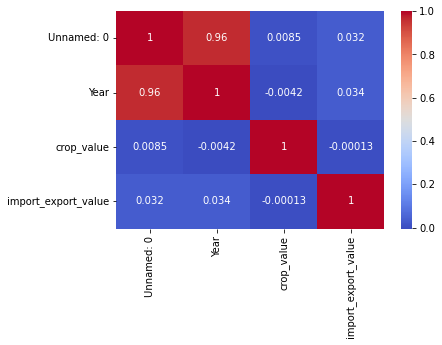

In [5]:
#Checking Correlation using heatmap
sns.heatmap(df_irishdata.corr(),annot=True,cmap='coolwarm')

 Observation:
    
-1 indicates a perfectly negative linear correlation between two variables. 0 indicates no linear correlation between two variables. 1 indicates a perfectly positive linear correlation between two variables

We can see that Year and Average Temperature have a Perfectly Positive Linear Correlation between both features. 0.85 Rain and Number of Wetdays are correlated. 0.64 Max airtemp and grass minimum temp are correlated. 0.79 grass_minimumtemp and mean/average airtemp are correlated. 0.86 grass_minimumtemp and minimum airtemp are correlated.

The target Crop_value we can see already does not have any correlation with any other feature 

# Univariate Analysis

<Figure size 864x360 with 0 Axes>

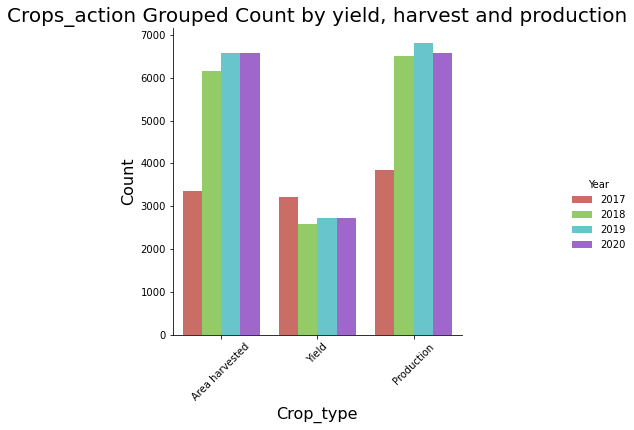

In [6]:
plt.figure(figsize=(12,5))
sns.catplot(x='crops_action', data=df_irishdata, palette="hls",kind='count',hue='Year')
plt.xlabel("Crop_type", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Crops_action Grouped Count by yield, harvest and production", fontsize=20)
plt.xticks(rotation=45)
plt.show()

Observations:

1. Crop action harvest adn production were both highest in 2020

2. 2013 was the lowest year for all 3 type s harvest, yield and Production

# Bivariate Analysis

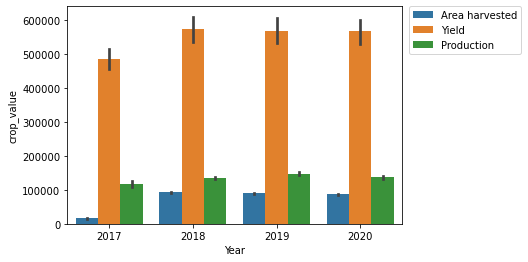

In [7]:
sns.barplot(x="Year" ,y="crop_value",hue="crops_action",data=df_irishdata)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

Observations:

Clearly observed that the crop yield for years 2018, 2019 and 2020 were best.


# Outliers Analysis

In [8]:
#Lets use the describe function 
df_irishdata.describe()

,Unnamed: 0,Year,crop_value,import_export_value
count,57660.000000,57660.000000,5.766000e+04,57660.000000
mean,28829.500000,2018.649462,1.931997e+05,9073.481408
std,16645.152598,1.067478,4.719297e+05,20373.360680
min,0.000000,2017.000000,2.000000e+00,25.000000
25%,14414.750000,2018.000000,5.890000e+03,331.000000
50%,28829.500000,2019.000000,1.492495e+05,2099.000000
75%,43244.250000,2020.000000,1.492495e+05,8378.000000
max,57659.000000,2020.000000,3.920000e+06,157805.000000


Observations:

 1.   I dont see any obvious outliers in the data above



In [9]:
df_irishdata.head()

,Unnamed: 0,Year,country,crop_measurement,crops_type,crops_action,crop_value,import_export_value
0,0,2017,Ireland,ha,Apples,Area harvested,695.0,615.0
1,1,2017,Ireland,ha,Apples,Area harvested,695.0,545.0
2,2,2017,Ireland,ha,Apples,Area harvested,695.0,1985.0
3,3,2017,Ireland,ha,Apples,Area harvested,695.0,14778.0
4,4,2017,Ireland,ha,Apples,Area harvested,695.0,17923.0


In [10]:
#Dropping ID and Source column from the data for outlier analysis
df_irishdata.drop(columns = ["Unnamed: 0","country","crop_measurement"],axis=1,inplace=True)
df_irishdata.dtypes

Year                     int64
crops_type              object
crops_action            object
crop_value             float64
import_export_value    float64
dtype: object

We have several categorical variables and will need to transform them into dummy variables with binary values in order to incorporate them into our model. This is done because despite having int values, they are not ordinal variables. In order to avoid multicollinearity we will also have to drop one of the dummy variables from each set. For example, 'month','crops_action','crops_type','country' the first variable will be dropped for our regression.

In [11]:
# create binary dummy variables from categorical variables and drop first column to avoid multicollinearity
df_irishdata = pd.get_dummies(df_irishdata, columns = ['crops_action','crops_type'],drop_first = True)


# inspect bike_data df with added dummy variables
df_irishdata.head(5)

,Year,crop_value,import_export_value,crops_action_Production,crops_action_Yield,crops_type_Apricots,crops_type_Avocados,crops_type_Bananas,crops_type_Barley,"crops_type_Beans, green",...,crops_type_Strawberries,crops_type_Sugar beet,crops_type_Sunflower seed,"crops_type_Tangerines, mandarins, clementines, satsumas",crops_type_Tomatoes,"crops_type_Vegetables, leguminous nes","crops_type_Walnuts, with shell",crops_type_Watermelons,crops_type_Wheat,"crops_type_Whey, dry"
0,2017,695.0,615.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,695.0,545.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,695.0,1985.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,695.0,14778.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017,695.0,17923.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


After creating the dummy variables we want to inspect the new full list of variables.

In [12]:
# check all columns for Nans
df_irishdata.isna().any()

Year                                     False
crop_value                               False
import_export_value                      False
crops_action_Production                  False
crops_action_Yield                       False
                                         ...  
crops_type_Vegetables, leguminous nes    False
crops_type_Walnuts, with shell           False
crops_type_Watermelons                   False
crops_type_Wheat                         False
crops_type_Whey, dry                     False
Length: 67, dtype: bool

# Creating the Multiple Regression and Evaluating the Model

# To start we will create a multiple regression using all of the independant features to get a baseline.

We will be using backward selection where we start with all of the predictor variables in the model, and after evaluating the variables, remove less useful predictors one at a time or in batches for categorical variables. We will take a look at the strength of the model (adj r2) and the statistical significance (P-value) of the indepenent variables and determine how to proceed in revising the model.

Below I will be creating a multiple regression model which is a supervised machine learning parametric method. To do that I will split our data into a training set (70%) and a test set(30%) standard. I will be fiting the multiple linear regression to the features and data from the training set and then testing the performance of the model against the test set


In [13]:
# set the target variable
y = df_irishdata['crop_value']

# set the independent predictor variables
X = df_irishdata.drop('crop_value', axis=1)

# split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)# 70% training and 30% test
X_train = sm.add_constant(X_train)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)
X_train.head()

Training split input-  (40362, 67)
Testing split input-  (17298, 66)


,const,Year,import_export_value,crops_action_Production,crops_action_Yield,crops_type_Apricots,crops_type_Avocados,crops_type_Bananas,crops_type_Barley,"crops_type_Beans, green",...,crops_type_Strawberries,crops_type_Sugar beet,crops_type_Sunflower seed,"crops_type_Tangerines, mandarins, clementines, satsumas",crops_type_Tomatoes,"crops_type_Vegetables, leguminous nes","crops_type_Walnuts, with shell",crops_type_Watermelons,crops_type_Wheat,"crops_type_Whey, dry"
41844,1.0,2020,6709.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28031,1.0,2019,7042.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
739,1.0,2017,7028.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
52189,1.0,2020,3186.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28013,1.0,2019,11551.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model 1 Linear Regression using all independant variables/features

In [14]:
# fit data to linear regression
mlr1 = sm.OLS(y_train, X_train).fit()

# view OLS regression results
print(mlr1.summary())

                            OLS Regression Results                            
Dep. Variable:             crop_value   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     412.0
Date:                Tue, 27 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:04:07   Log-Likelihood:            -5.7390e+05
No. Observations:               40362   AIC:                         1.148e+06
Df Residuals:                   40295   BIC:                         1.149e+06
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

R Squared, also known as the coefficient of determination, displays the variation in the depdendent target variable y as explained by the independent predictor x variables. In other words, the percentage of the prediction outcome that can be attributed to the predictor variables of the model. Another way to look at it is R2 = explained variation / total variation. The higher the number the better the data fits the model in question.

Adjusted R Squared is used when multiple independent predictor variables exist and includes a penalty for adding additional predictors. This allows us to compare the effectiveness of different models with differing numbers of predictor variables. This is required because as I add predictors, R2 will always continue to increase, even if there is just a chance correlation between variables. In general a parsimonious model is preferred given that it meets reasonable Adjusted R Squared and statistical significance criteria.

P-Values measure the statistical significance of each variable in the model within the context of all variables in the model. It is essentially a measure of the liklihood of achieving results as extreme as were observed given a null hypothesis. In other words, the likeliness of the results being explained by random chance. A very low P-value is desired with .05 or .01 often being used as the standard depending on the context and several factors.

Model 1

Here we take a look at the strength of the model (adj r2) and the statistical significance (P-value) of the indepenent variables.

Adj R2: 0.363

There are many variables that have an unacceptably high P-value, particularly several of the categorical ones. Given that they are binary categorical dummy variables, it doesn't make much sense to keep some of them and drop only the problematic ones. For our second model we will be dropping all of variables below.

max_airtemp min_airtemp grass_minimumtemp

rain


# Model 2 - Linear Regression (Dropping all of the month columns the P values are high) backward selection

In [15]:
X_train

,const,Year,import_export_value,crops_action_Production,crops_action_Yield,crops_type_Apricots,crops_type_Avocados,crops_type_Bananas,crops_type_Barley,"crops_type_Beans, green",...,crops_type_Strawberries,crops_type_Sugar beet,crops_type_Sunflower seed,"crops_type_Tangerines, mandarins, clementines, satsumas",crops_type_Tomatoes,"crops_type_Vegetables, leguminous nes","crops_type_Walnuts, with shell",crops_type_Watermelons,crops_type_Wheat,"crops_type_Whey, dry"
41844,1.0,2020,6709.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28031,1.0,2019,7042.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
739,1.0,2017,7028.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
52189,1.0,2020,3186.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28013,1.0,2019,11551.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,1.0,2017,665.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8006,1.0,2017,9539.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17745,1.0,2018,1100.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17931,1.0,2018,8734.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#Dropping all of the features below with a high p-value from the training model
X_train2 = X_train.drop(['crops_action_Production', 'crops_action_Yield'], axis=1)
mlr2 = sm.OLS(y_train, X_train2).fit()
print(mlr2.summary())

                            OLS Regression Results                            
Dep. Variable:             crop_value   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     231.5
Date:                Tue, 27 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:06:13   Log-Likelihood:            -5.7799e+05
No. Observations:               40362   AIC:                         1.156e+06
Df Residuals:                   40297   BIC:                         1.157e+06
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

There are still several variables that have an unacceptably high P-value, particularly the mean_airtemp average_temperature variables. We will be dropping all of the hour variables as well for our third model and observing the change.

There is no change with the Adj R2: 0.363 value.


# Model 3 - Linear Regression (Dropping all of the hour columns) backward selection

In [17]:
#Dropping all of the categorial dummie Crop values  Group features with a high p-value from the training model
X_train3 = X_train2.drop(['crops_type_Cabbages and other brassicas','crops_type_Chillies and peppers, green','crops_type_Linseed','crops_type_Onions, dry','crops_type_Strawberries','crops_type_Whey, dry'], axis=1)
mlr3 = sm.OLS(y_train, X_train2).fit()
print(mlr3.summary())

                            OLS Regression Results                            
Dep. Variable:             crop_value   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     231.5
Date:                Tue, 27 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:07:34   Log-Likelihood:            -5.7799e+05
No. Observations:               40362   AIC:                         1.156e+06
Df Residuals:                   40297   BIC:                         1.157e+06
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

Model 3

For our third model, we see that the adjusted R2 has stayed the same after dropping all hour features.

Adj. R-squared: 0.363

There are some of the actual crops with a very high P Value I will drop some of these to see does it improve our accuracy.


After looking at the results from model 3 I will keep this as our final model as all pvalues are under 0.5 infact almost at 0

# After looking at the results from model 3 I will keep this as our final model as all pvalues are under 0.5 infact almost at 0

# Variance Inflation Factors (VIF)

Variance inflation factors range from a value of 1.0 and upwards. The VIF helps us quantify the severity of multicollinearity in an OLS regression. The VIF value tells us how much larger the standard error increases compared to if that variable had 0 correlation to other independent predictor variables in your model.

In [18]:
# create dataframe to calculate and display VIF for each variable
vif = pd.DataFrame()
vif['Features'] = X_train3.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4149129.89
13,crops_type_Cereals nes,1.96
19,"crops_type_Fruit, citrus nes",1.95
31,crops_type_Maize,1.95
15,crops_type_Cucumbers and gherkins,1.95
11,crops_type_Carrots and turnips,1.95
8,crops_type_Berries nes,1.95
33,crops_type_Mushrooms and truffles,1.94
38,crops_type_Oranges,1.94
20,"crops_type_Fruit, pome nes",1.94


# All of the variables have relatively low VIF values with the exception of station id which is still below our cuttoff of 5.0 which is acceptable.

Looking at the results above and interpreting them 1 = not correlated. Between 1 and 5 = moderately correlated. Greater than 5 = highly correlated.

Moderately correlated 59 crops_type_Walnuts, with shell 1.20 14 crops_type_Carrots and turnips 1.19 60 crops_type_Watermelons 1.10 41 crops_type_Oranges 1.08 28 crops_type_Hazelnuts, with shell 1.06

We can see that features 5 to 12 have a VIF of infinity this means there is perfect correlation.

5 crops_action_Yield 87.30 9 crops_type_Barley 61.10 6 crops_type_Apricots 10.34 7 crops_type_Avocados 10.09


# Making Predictions With Final Model

We are going to create our final model for prediction using the final set of variables that we had in our final training model.

In [19]:
# drop predictive variables to prepare final model
X_test = sm.add_constant(X_test)
X_test_1 = X_test[X_train3.columns] 

# fit data to linear regression for final model using test data
mlr_test = sm.OLS(y_test, X_test_1).fit()

# inspect X_test data
X_test_1.head()

,const,Year,import_export_value,crops_type_Apricots,crops_type_Avocados,crops_type_Bananas,crops_type_Barley,"crops_type_Beans, green",crops_type_Berries nes,"crops_type_Broad beans, horse beans, dry",...,crops_type_Soybeans,crops_type_Spinach,crops_type_Sugar beet,crops_type_Sunflower seed,"crops_type_Tangerines, mandarins, clementines, satsumas",crops_type_Tomatoes,"crops_type_Vegetables, leguminous nes","crops_type_Walnuts, with shell",crops_type_Watermelons,crops_type_Wheat
19560,1.0,2018,709.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19006,1.0,2018,1724.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49403,1.0,2020,1775.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11754,1.0,2018,3142.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8009,1.0,2017,1340.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we will make predictions of the y variable which is bikes_available using our final test model

In [20]:
# Making predictions using the final model
y_pred = mlr_test.predict(X_test_1)

# Evaluating Predictions of Final Model

To evaluate our final model we will look a number of data points and visualizations. First we start off with a distribution plot of predicted y values subtracted from the actual y values from the test dataset. This will help us visualize the distribution of errors. We also take a look at a scatter plot of predicted y values vs actuals from the test data set

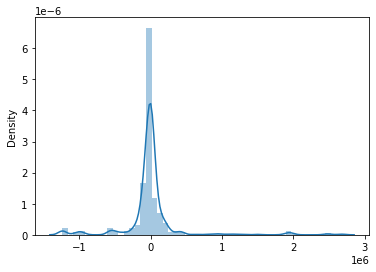

In [21]:
# distribution plot of predicted y values vs test y values
sns.distplot((y_test - y_pred), bins=50);

Text(0, 0.5, 'y_pred')

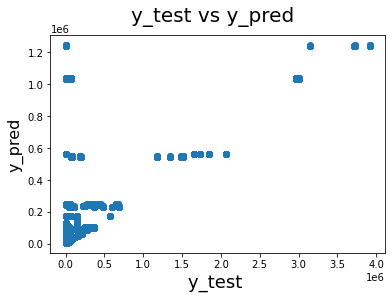

In [22]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16) 

We can see from the graph above observing the spread for y_pred and Y_test there is a couple of outliers but for the majority we can say that there is infact a high linear correlation. The RMSE is the standard deviation of the prediction errors also known as residuals. This helps us understand how well the actual data fits our model.


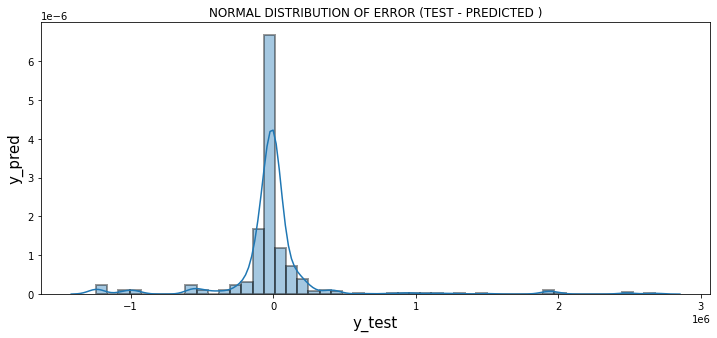

In [23]:
## * NORMAL DISTRIBUTION OF ERROR (TEST - PREDICTED ) *

plt.figure(figsize=(12,5))
sns.distplot((y_test-y_pred),bins=50,hist_kws=dict(edgecolor="k", linewidth=2));
plt.xlabel('y_test', fontsize='15')
plt.ylabel('y_pred', fontsize='15')
plt.title("NORMAL DISTRIBUTION OF ERROR (TEST - PREDICTED )")
plt.savefig("lr1")

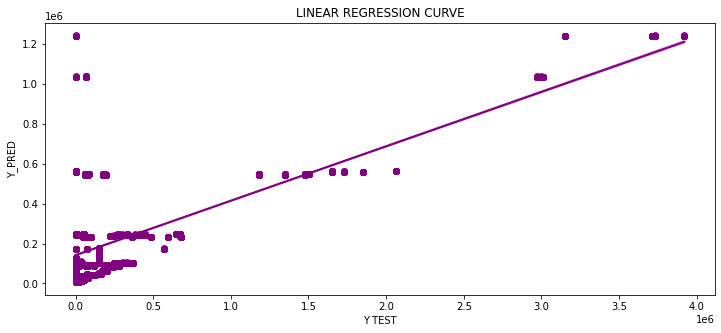

In [24]:
### LINEAR REGRESSION CURVE

plt.figure(figsize=(12,5))
sns.regplot(y_test,y_pred,df_irishdata,color='purple')
plt.xlabel("Y TEST")
plt.ylabel("Y_PRED")
plt.title("LINEAR REGRESSION CURVE")
plt.savefig("lr3")

Lastly, we will look at the R Squared (R2), Adjusted R Squared (Adj R2), and Root Mean Square Error (RMSE) values for the predictions.

The RMSE is the standard deviation of the prediction errors also known as residuals. This helps us understand how well the actual data fits our model.


In [26]:
# create R2 score
r2 = r2_score(y_test, y_pred)

# create Adjusted R2 Score
p = len(X_test_1.columns)
n = y_test.shape[0]
adj_r2 = 1 - (1 - r2) * ((n - 1)/(n-p-1))

# create RMSE score
rmse = mean_squared_error(y_test, y_pred, squared = False)


# print final model performance stats
print(str(p) + " Predictors in Test Set")
print(str(n) + " Records in Test Set")
print("R2: " + str(r2))
print("Adj R2: " + str(adj_r2))
print("RMSE: " + str(rmse))

59 Predictors in Test Set
17298 Records in Test Set
R2: 0.272726306100741
Adj R2: 0.27023708763339815
RMSE: 408690.4408581288


Let's compare the R2 and Adj R2 values from the training dataset vs the test dataset.

Training Dataset

R2: 0.272726306100741 Adj R2: 0.27023708763339815


# Final Linear Model Conclusion

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 162917.37825348362
Mean Squared Error: 167027876448.81165
Root Mean Squared Error: 408690.4408581288


MAE: A metric that tells us the mean absolute difference between the predicted values and the actual values in a dataset. The lower the MAE, the better a model fits a dataset

The lower the MSE the higher the accuracy of prediction as there would be excellent match between the actual and predicted data set

RMSE: A metric that tells us the square root of the average squared difference between the predicted values and the actual values in a dataset. The lower the RMSE, the better a model fits a dataset


In [28]:
#print the R2_Score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.272726306100741

# Multiple Linear Regression Not using Stats Models


In [29]:
#Reading in df_irishdmodels cleaned dataset
df_irishdata = pd.read_csv('df_irishmodels.csv')

df_irishdata.head()

,Unnamed: 0,Year,country,crop_measurement,crops_type,crops_action,crop_value,import_export_value
0,0,2017,Ireland,ha,Apples,Area harvested,695.0,615.0
1,1,2017,Ireland,ha,Apples,Area harvested,695.0,545.0
2,2,2017,Ireland,ha,Apples,Area harvested,695.0,1985.0
3,3,2017,Ireland,ha,Apples,Area harvested,695.0,14778.0
4,4,2017,Ireland,ha,Apples,Area harvested,695.0,17923.0


In [30]:
#Dropping the below 3 columns from our regression
df_irishdata.drop('country', axis=1, inplace=True)
df_irishdata.drop('Unnamed: 0', axis=1, inplace=True)
df_irishdata.drop('crop_measurement', axis=1, inplace=True)

In [31]:
# create binary dummy variables from categorical variables and drop first column to avoid multicollinearity
df_irishdata = pd.get_dummies(df_irishdata, columns = ['crops_action','crops_type'],drop_first = True)


# inspect bike_data df with added dummy variables
df_irishdata.head(5)

,Year,crop_value,import_export_value,crops_action_Production,crops_action_Yield,crops_type_Apricots,crops_type_Avocados,crops_type_Bananas,crops_type_Barley,"crops_type_Beans, green",...,crops_type_Strawberries,crops_type_Sugar beet,crops_type_Sunflower seed,"crops_type_Tangerines, mandarins, clementines, satsumas",crops_type_Tomatoes,"crops_type_Vegetables, leguminous nes","crops_type_Walnuts, with shell",crops_type_Watermelons,crops_type_Wheat,"crops_type_Whey, dry"
0,2017,695.0,615.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,695.0,545.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,695.0,1985.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,695.0,14778.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017,695.0,17923.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# set the target variable
y = df_irishdata['crop_value']

# set the independent predictor variables
X = df_irishdata.drop('crop_value', axis=1)

In [33]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)
X_train.head()

Training split input-  (40362, 66)
Testing split input-  (17298, 66)


,Year,import_export_value,crops_action_Production,crops_action_Yield,crops_type_Apricots,crops_type_Avocados,crops_type_Bananas,crops_type_Barley,"crops_type_Beans, green",crops_type_Berries nes,...,crops_type_Strawberries,crops_type_Sugar beet,crops_type_Sunflower seed,"crops_type_Tangerines, mandarins, clementines, satsumas",crops_type_Tomatoes,"crops_type_Vegetables, leguminous nes","crops_type_Walnuts, with shell",crops_type_Watermelons,crops_type_Wheat,"crops_type_Whey, dry"
33306,2019,5034.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12239,2018,237.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31367,2019,8378.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7408,2017,82595.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3069,2017,1194.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Training the Multiple Linear Regression model on the Training set
#This is the same code we used in Simple Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predicting the Test set results
#Remember that we need to check our training results on the Test set but we can't plot a graph
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2) #we display values with only 2 decimals after the comma

In [36]:
#We calculate the precision of the model or r^2
print('The precision of the model is ')
print(regressor.score(X_train, y_train))

The precision of the model is 
0.4057153111796963


In [37]:
#We build the equation
print('a = ')
print(regressor.coef_)

print('The interception is: ')
print(regressor.intercept_)

a = 
[ 3.65e+03  1.16e-01  5.14e+04  5.00e+05  2.04e+05  2.03e+05  2.03e+05
  4.41e+05 -7.71e+04 -9.42e+04 -6.86e+04  2.69e+05 -3.54e+03  1.36e+05
 -5.93e+04 -4.07e+04  2.03e+05  3.61e+04  5.06e+05 -8.51e+04  2.03e+05
  2.02e+05  2.04e+05  2.03e+05  2.02e+05  2.03e+05  2.02e+05  2.04e+05
  2.03e+05  2.03e+05 -2.28e+04  2.03e+05 -1.43e+04  7.79e+04  2.03e+05
  2.03e+05  2.03e+05  9.02e+05  2.03e+05 -1.45e+04  1.85e+05  2.03e+05
  6.22e+03  2.04e+05  2.03e+05 -8.41e+04 -9.32e+04  1.46e+05  2.03e+05
 -4.31e+04 -5.04e+04  2.04e+05  1.77e+05  1.12e+05  1.77e+05 -5.48e+04
  1.00e+04  1.75e+05 -5.64e+03  2.02e+05  1.12e+06  1.87e+05  2.02e+05
  2.03e+05  1.22e+05  7.77e+04]
The interception is: 
-7457920.431832398


Regression Diagnostics

The aim was to confirm whether the underlying assumptions of linear regression have been met which includes linearity, homoscedasticity, indpendence and normality. An asssement of various plots and statistical testing would reveal the above.

The Scale Location Plot would indicate whether (homoscedasticity or heterescedasticity) is present among residuals. The line should be roughly horizontal which would give an indication that the variance of the residuals is approximately the same for all the fitted values. Also, no patterns should be visual among the residuals. These two conditions if met would indicate homosedasticity, one of the underlying assumptions of linear regression.

The Actual vs Fitted plot is used to compare both the predicted values and the actual values. Ideally, the individual points in this plot should be close to forming a 45 degree straight line, indicating that predicted values are close to the actual values.

Residuals vs Fitted plot can utilized to identify non linearity, non - constant error variances and outliers. In this plot we would be looking for the residuals to be spread equaly around a horizontal line with no distinct patterns visible. This would further solidify homscedasticity.

The Normal QQ Plot will indicate whether the residuals are following a normal distribution or whether they deviate from a normal distibution. In this plot we are looking for the residuals to follow close to the line, if they dieviate this indicates the residuals do not follow a nomral distribution.

There are Statisitcal Measure's such as:

The 'Breush Pogan Test' which is used to check for varaince equality. The resulting value returned will inidcate whether the homoscedacitiy/heteroscacity is present among residuals.

The Durbin Watson Test could be utilized in this case to identify whether there is correlation present among the residuals. A value close to [2] reveals there is no correlation present. A value close to [0] reveals a strong positve correaltion is present and where values closer to [4] would indicate strong negative correlation being present.

All of the above techniques and metrics help identify whether the underlying assumptions of linear regression have been met.


# Ridge Regression - Model 2

In [38]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

We will first train our first ridge regression model by setting to 1. This is the equivalent of running ordinary least squares regression with no penalty. Note that Scikit confusingly names the lambda parameter as alpha

In [40]:
#Reading in df_irishdmodels cleaned dataset
df_irishdata = pd.read_csv('df_irishmodels.csv')

In [41]:
#Dropping the below 3 columns from our regression
df_irishdata.drop('country', axis=1, inplace=True)
df_irishdata.drop('Unnamed: 0', axis=1, inplace=True)
df_irishdata.drop('crop_measurement', axis=1, inplace=True)

In [42]:
#inspect dataframe
df_irishdata.head()

,Year,crops_type,crops_action,crop_value,import_export_value
0,2017,Apples,Area harvested,695.0,615.0
1,2017,Apples,Area harvested,695.0,545.0
2,2017,Apples,Area harvested,695.0,1985.0
3,2017,Apples,Area harvested,695.0,14778.0
4,2017,Apples,Area harvested,695.0,17923.0


In [43]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.4f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.4f}".format(ridge.score(X_test, y_test)))

Training set score: 0.4057
Test set score: 0.3991


In [44]:
# alpha = 10
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.41
Test set score: 0.40


In [45]:
# alpha = 0.1
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.41
Test set score: 0.40


# Logistic Regression Classification (binary) - Model 3

In [46]:
df_irishdata.head()

,Year,crops_type,crops_action,crop_value,import_export_value
0,2017,Apples,Area harvested,695.0,615.0
1,2017,Apples,Area harvested,695.0,545.0
2,2017,Apples,Area harvested,695.0,1985.0
3,2017,Apples,Area harvested,695.0,14778.0
4,2017,Apples,Area harvested,695.0,17923.0


In [47]:
#Printing the mean of the target / dependant variable
mean_cropval= df_irishdata['crop_value'].mean()
print(mean_cropval)

193199.6637651423


# Creating a new feature called Average Crop Price to find out if the crop value is less than the cropaverage value

In [48]:
#The affordable column now has a value of 1 whenever the price is < 81432.7401053934, and 0 otherwise.
df_irishdata['average_crop_value'] = np.where(df_irishdata['crop_value'] < 181432.7401053934, 1, 0)
df_irishdata

,Year,crops_type,crops_action,crop_value,import_export_value,average_crop_value
0,2017,Apples,Area harvested,695.0,615.0,1
1,2017,Apples,Area harvested,695.0,545.0,1
2,2017,Apples,Area harvested,695.0,1985.0,1
3,2017,Apples,Area harvested,695.0,14778.0,1
4,2017,Apples,Area harvested,695.0,17923.0,1
...,...,...,...,...,...,...
57655,2020,Wheat,Production,364920.0,8262.0,0
57656,2020,Wheat,Production,364920.0,2099.0,0
57657,2020,Wheat,Production,364920.0,646.0,0
57658,2020,Wheat,Production,364920.0,174.0,0


In [49]:
df_irishdata['average_crop_value'].describe()

count    57660.000000
mean         0.858359
std          0.348684
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: average_crop_value, dtype: float64

# Splitting the data below in train test and dev

In [51]:
df_train, df_test = train_test_split(df_irishdata, test_size=0.2, random_state=20, stratify=df_irishdata['average_crop_value'])
df_train, df_dev = train_test_split(df_train, test_size=0.20, random_state=40)

# ensure our dataset splits are of the % sizes we want
total_size = len(df_train) + len(df_dev) + len(df_test)
print("train:", len(df_train), "=>", len(df_train) / total_size)
print("dev:", len(df_dev), " =>", len(df_dev) / total_size)
print("test:", len(df_test), "=>", len(df_test) / total_size)

train: 36902 => 0.6399930627818244
dev: 9226  => 0.16000693721817552
test: 11532 => 0.2


In [52]:
df_irishdata.head()

,Year,crops_type,crops_action,crop_value,import_export_value,average_crop_value
0,2017,Apples,Area harvested,695.0,615.0,1
1,2017,Apples,Area harvested,695.0,545.0,1
2,2017,Apples,Area harvested,695.0,1985.0,1
3,2017,Apples,Area harvested,695.0,14778.0,1
4,2017,Apples,Area harvested,695.0,17923.0,1


Removing 'average_crop_value' from the dataframes below and creating it as a seperate prediction dataframe

In [54]:
# training
x_train = df_train.drop(['crop_value', 'average_crop_value'], axis=1)
y_train = pd.DataFrame(data=df_train['average_crop_value'], columns=["average_crop_value"])

# dev
x_dev = df_dev.drop(['crop_value', 'average_crop_value'], axis=1)
y_dev = pd.DataFrame(data=df_dev["average_crop_value"], columns=["average_crop_value"])

# test
x_test = df_test.drop(['crop_value', 'average_crop_value'], axis=1)
y_test = pd.DataFrame(data=df_test['average_crop_value'], columns=["average_crop_value"])

# EDA and cleaning based on the training set, x_train

In [ ]:
for col in x_train.columns:
    print(col, ":", np.sum([x_train[col].isnull()]))

In [ ]:
# dropping the null values
df_irishdata.dropna(axis=0,inplace=True)

In [ ]:
#checking the shape after dropping
print("The shape of the data after dropping the null values is: ",df_irishdata.shape)

In [ ]:
x_train.describe()

In [ ]:
x_train.info()

In [ ]:
#checking the shape after dropping
print("The shape of the data after dropping the null values is: ",y_train.shape)

The remaining columns of our training data all have reasonable summary statistics. None of the min's or max's are a cause for concern, and we have no reason to assert a certain distribution of values. Since all the feature values are within reasonable ranges, and there are no missing values (NaNs) remaining

In [ ]:
for col in x_train.columns:
   print(col, ":", np.sum([x_train[col].isnull()]))

In [ ]:
[col for col in x_train.columns]

In [ ]:
scatter_matrix(x_train, figsize=(30,20));

# Predicing with maximum likelihood estimation (MLE) using the training set MLE for 𝑦, where 𝑦∈{0,1}

In [ ]:
mle_y = y_train['average_crop_value'].value_counts().idxmax()
dev_accuracy = y_dev['average_crop_value'].value_counts()[mle_y] / len(y_dev['average_crop_value'])
dev_accuracy

Our Predictions using logistic Regression are 85 percent so this is a high level of accuracy

# Model 4 Decision Tree Regression

In [61]:
#Reading in df_irishdmodels cleaned dataset
df_irishdata = pd.read_csv('df_irishmodels.csv')

In [62]:
df_irishdata.head()

,Unnamed: 0,Year,country,crop_measurement,crops_type,crops_action,crop_value,import_export_value
0,0,2017,Ireland,ha,Apples,Area harvested,695.0,615.0
1,1,2017,Ireland,ha,Apples,Area harvested,695.0,545.0
2,2,2017,Ireland,ha,Apples,Area harvested,695.0,1985.0
3,3,2017,Ireland,ha,Apples,Area harvested,695.0,14778.0
4,4,2017,Ireland,ha,Apples,Area harvested,695.0,17923.0


In [63]:
#Dropping the below 3 columns from our regression

#df_irishdata.drop(['month'], axis=1, inplace=True)
df_irishdata.drop(['country'], axis=1, inplace=True)
df_irishdata.drop('Unnamed: 0', axis=1, inplace=True)
df_irishdata.drop('crop_measurement', axis=1, inplace=True)

In [64]:
# create binary dummy variables from categorical variables and drop first column to avoid multicollinearity
df_irishdata = pd.get_dummies(df_irishdata, columns = ['crops_action','crops_type'],drop_first = True)


# inspect bike_data df with added dummy variables
df_irishdata.head(5)

,Year,crop_value,import_export_value,crops_action_Production,crops_action_Yield,crops_type_Apricots,crops_type_Avocados,crops_type_Bananas,crops_type_Barley,"crops_type_Beans, green",...,crops_type_Strawberries,crops_type_Sugar beet,crops_type_Sunflower seed,"crops_type_Tangerines, mandarins, clementines, satsumas",crops_type_Tomatoes,"crops_type_Vegetables, leguminous nes","crops_type_Walnuts, with shell",crops_type_Watermelons,crops_type_Wheat,"crops_type_Whey, dry"
0,2017,695.0,615.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,695.0,545.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,695.0,1985.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,695.0,14778.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017,695.0,17923.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# set the target variable

X = df_irishdata.iloc[:, 1:74].values
y = df_irishdata.iloc[:, 4].values
# set the independent predictor variables

In [66]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [67]:
# splitting the dataaset into Training and Testing Data 
from sklearn.model_selection import train_test_split

# random state is 0 and test size if 30%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=0)#70 Training and 30 Test
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (40362, 66)
Testing split input-  (17298, 66)


Once we split the data, the next step is to scale our dataset so the extreme values will not have too much effect on the prediction of our model. Notice that we are only scaling the input values, not the output ones. Now, our data is ready for training the model using a decision tree algorithm.


# Fitting the model using Standard Scaler

In [ ]:
# importing standard scalling method from sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# providing the inputs for the scalling purpose
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Decision Tree

In [68]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [69]:
#Predicting the outputs
y_pred = regressor.predict(X_test)

# Visualising Decision Tree (Training Model)using Sklearn

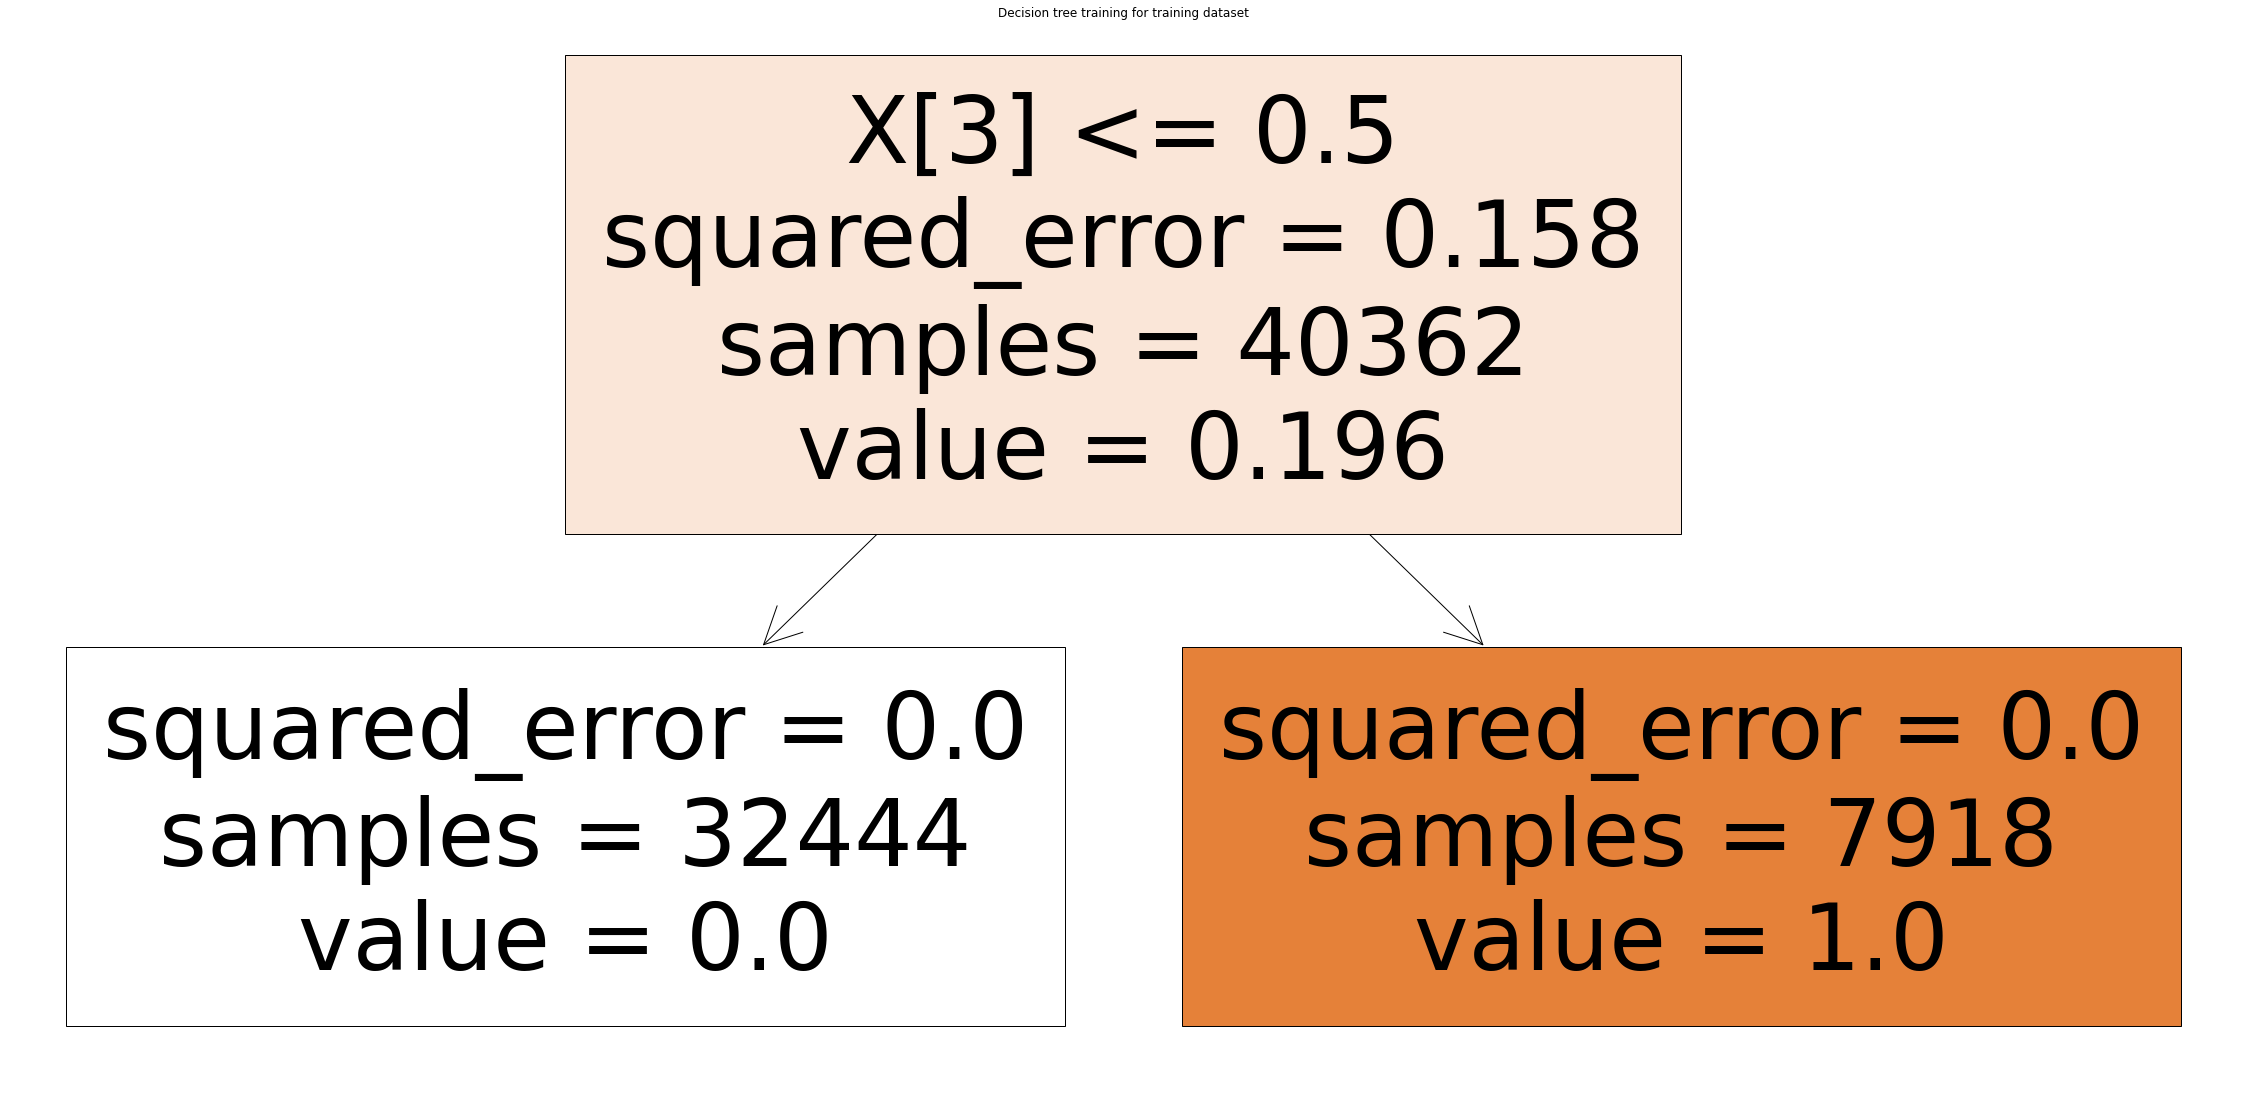

In [70]:
# importing the plot tree method
from sklearn.tree import DecisionTreeRegressor, plot_tree
clf = DecisionTreeRegressor()

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
clf = clf.fit(X_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree training for training dataset")
plt.show()

# Visualising Decision Tree (Testing Dataset)using Sklearn

In [ ]:
# importing the plot tree method
from sklearn.tree import DecisionTreeRegressor, plot_tree
clf = DecisionTreeRegressor()

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
clf = clf.fit(X_test, y_test)
plot_tree(clf, filled=True)
plt.title("Decision tree training for training dataset")
plt.show()

# Decision Tree Text based Tree

In [71]:
# importing the tree
from sklearn import tree

# text based tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_3 <= 0.50
|   |--- value: [0.00]
|--- feature_3 >  0.50
|   |--- value: [1.00]



# Evaluating Decision Tree Model

Checking the Accuracy of the Decision Tree Model

In [72]:
# Model Accuracy, how often is the regressor correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


# Classification Report for Decision Tree

In [73]:
# Predicting the values of test data
y_pred = regressor.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13953
           1       1.00      1.00      1.00      3345

    accuracy                           1.00     17298
   macro avg       1.00      1.00      1.00     17298
weighted avg       1.00      1.00      1.00     17298



In [74]:
# creating confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

Text(0.5, 15.0, 'Predicted label')

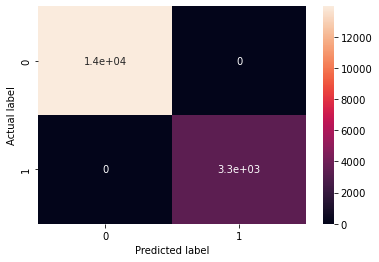

In [75]:
# Making the Confusion Matrix
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm,annot=True)
plt.savefig('confusion.png')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Confusion Matrix Values

Print the True Positive, True Negative, False Positive, and False Negative values by using python code.

In [76]:
# defining a function which takes acutal and pred values
def confusion_values(y_actual, y_pred):

    # initializing the values with zero value
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    # iterating through the values using a for loop
    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        if y_actual[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1

    # printing the values
    print("True Positive: ", TP)
    print("False Positive:", FP)
    print("True Negative: ", TN)
    print("False Negative: ", FN)

# calling the function and passing in the parameters from the results of the iterations in the for loop
confusion_values(y_test, y_pred)

True Positive:  3345
False Positive: 0
True Negative:  13953
False Negative:  0


True Positive: A true positive is an outcome where the model correctly predicts the positive class. True Negative: A true negative is an outcome where the model correctly predicts the negative class. False Positive: A false negative is an outcome where the model incorrectly predicts the positive class. False Negative: A false negative is an outcome where the model incorrectly predicts the negative class.

In [81]:
# importing the required module and methods
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f'Accuracy-score: {accuracy_score(y_test, y_pred):.3f}')

Accuracy-score: 1.000


In [82]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

models = [LinearRegression(),
         Ridge(),
         HuberRegressor(),
         ElasticNetCV(),
         DecisionTreeRegressor(),
         RandomForestRegressor(),
         ExtraTreesRegressor(),
         GradientBoostingRegressor()]

In [83]:
from sklearn import model_selection
def train(model):
    kfold = model_selection.KFold(n_splits=5, random_state=None, shuffle=False)
    pred = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    cv_score = pred.mean()
    print('Model:',model)
    print('CV score:', abs(cv_score))

In [84]:
# using for loop to go through the models
for model in models:
    train(model)

Model: LinearRegression()
CV score: 4.0217681888195324e-22
Model: Ridge()
CV score: 5.558997266889481e-09
Model: HuberRegressor()
CV score: 0.15032552319993228
Model: ElasticNetCV()
CV score: 0.13765927560132993
Model: DecisionTreeRegressor()
CV score: 0.0
Model: RandomForestRegressor()
CV score: 0.0
Model: ExtraTreesRegressor()
CV score: 0.0
Model: GradientBoostingRegressor()
CV score: 1.1191377099678122e-10


# Model 5 Random Forest Regression

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
#Reading in df_irishdmodels cleaned dataset
df_irishdata = pd.read_csv('df_irishmodels.csv')
df_irishdata.tail()

,Unnamed: 0,Year,country,crop_measurement,crops_type,crops_action,crop_value,import_export_value
57655,57655,2020,Ireland,tonnes,Wheat,Production,364920.0,8262.0
57656,57656,2020,Ireland,tonnes,Wheat,Production,364920.0,2099.0
57657,57657,2020,Ireland,tonnes,Wheat,Production,364920.0,646.0
57658,57658,2020,Ireland,tonnes,Wheat,Production,364920.0,174.0
57659,57659,2020,Ireland,tonnes,Wheat,Production,364920.0,50992.0


In [87]:
#Dropping the below 3 columns from our regression
#df_irishdata.drop('month', axis=1, inplace=True)
df_irishdata.drop('country', axis=1, inplace=True)
df_irishdata.drop('Unnamed: 0', axis=1, inplace=True)
df_irishdata.drop('crop_measurement', axis=1, inplace=True)

In [88]:
# create binary dummy variables from categorical variables and drop first column to avoid multicollinearity
df_irishdata = pd.get_dummies(df_irishdata, columns = ['crops_action','crops_type'],drop_first = True)

In [89]:
df_irishdata.head()

,Year,crop_value,import_export_value,crops_action_Production,crops_action_Yield,crops_type_Apricots,crops_type_Avocados,crops_type_Bananas,crops_type_Barley,"crops_type_Beans, green",...,crops_type_Strawberries,crops_type_Sugar beet,crops_type_Sunflower seed,"crops_type_Tangerines, mandarins, clementines, satsumas",crops_type_Tomatoes,"crops_type_Vegetables, leguminous nes","crops_type_Walnuts, with shell",crops_type_Watermelons,crops_type_Wheat,"crops_type_Whey, dry"
0,2017,695.0,615.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,695.0,545.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,695.0,1985.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,695.0,14778.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017,695.0,17923.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
X = df_irishdata.iloc[:, 1:75].values
y = df_irishdata.iloc[:, 2].values

In [91]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [92]:
# Training the Random Forest Regression model on the whole dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [93]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 5279.  5279.]
 [   51.    51.]
 [ 6946.  6946.]
 ...
 [   85.    85.]
 [  913.   913.]
 [10623. 10623.]]


In [94]:
# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

1.0

# Brazilian Dataset Machine Learning

# Below the Csv after been explored and cleaned has now been saved so as I can just read this in for my models going forward

In [103]:
df_brazildata = pd.read_csv('df_brazilmodels.csv')

# Read in df_brazilmodels.csv into the df_brazildata frame for linear model

In [104]:
df_brazildata.head()

,Unnamed: 0,year,country,months,crop_measurement,crops_type,crops_action,crop_value,consumer_value
0,1464,2010,Brazil,January,tonnes,Chestnut,Production,5.333023e+06,3.559127
1,1471,2010,Brazil,August,tonnes,Chestnut,Production,5.333023e+06,4.098498
2,1465,2010,Brazil,February,tonnes,Chestnut,Production,5.333023e+06,4.271629
3,1470,2010,Brazil,July,tonnes,Chestnut,Production,5.333023e+06,4.338587
4,1469,2010,Brazil,June,tonnes,Chestnut,Production,5.333023e+06,5.074611


In [105]:
# create binary dummy variables from categorical variables and drop first column to avoid multicollinearity
df_brazildata = pd.get_dummies(df_brazildata, columns = ['crops_action','crops_type','months','crop_measurement'],drop_first = True)

In [106]:
# inspect bike_data df with added dummy variables
df_brazildata.head(5)

,Unnamed: 0,year,country,crop_value,consumer_value,crops_action_Laying,crops_action_Producing Animals/Slaughtered,crops_action_Production,crops_action_Stocks,crops_action_Yield,...,months_October,months_September,crop_measurement_1000 Head,crop_measurement_1000 No,crop_measurement_100mg/An,crop_measurement_No,crop_measurement_No/An,crop_measurement_ha,crop_measurement_hg/ha,crop_measurement_tonnes
0,1464,2010,Brazil,5.333023e+06,3.559127,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1471,2010,Brazil,5.333023e+06,4.098498,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1465,2010,Brazil,5.333023e+06,4.271629,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1470,2010,Brazil,5.333023e+06,4.338587,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1469,2010,Brazil,5.333023e+06,5.074611,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [107]:
#Reading in brazilian Crops dataset from between 2010 to 2020 8 actions 10 crop measurements and 139 crop types
df_brazildata = pd.read_csv('df_brazilmodels.csv')
df_brazildata.head()

,Unnamed: 0,year,country,months,crop_measurement,crops_type,crops_action,crop_value,consumer_value
0,1464,2010,Brazil,January,tonnes,Chestnut,Production,5.333023e+06,3.559127
1,1471,2010,Brazil,August,tonnes,Chestnut,Production,5.333023e+06,4.098498
2,1465,2010,Brazil,February,tonnes,Chestnut,Production,5.333023e+06,4.271629
3,1470,2010,Brazil,July,tonnes,Chestnut,Production,5.333023e+06,4.338587
4,1469,2010,Brazil,June,tonnes,Chestnut,Production,5.333023e+06,5.074611


In [108]:
#Dropping ID and Source column from the data for outlier analysis
df_brazildata.drop(columns=["Unnamed: 0","country"],axis=1,inplace=True)
df_brazildata.dtypes

year                  int64
months               object
crop_measurement     object
crops_type           object
crops_action         object
crop_value          float64
consumer_value      float64
dtype: object

In [109]:
# create binary dummy variables from categorical variables and drop first column to avoid multicollinearity
df_brazildata = pd.get_dummies(df_brazildata, columns = ['crops_action','crops_type','months','crop_measurement'],drop_first = True)

In [110]:
# check all columns for Nans
df_brazildata.isna().any()

year                                          False
crop_value                                    False
consumer_value                                False
crops_action_Laying                           False
crops_action_Producing Animals/Slaughtered    False
                                              ...  
crop_measurement_No                           False
crop_measurement_No/An                        False
crop_measurement_ha                           False
crop_measurement_hg/ha                        False
crop_measurement_tonnes                       False
Length: 109, dtype: bool

# Creating the Multiple Regression and Evaluating the Model

To start we will create a multiple regression using all of the independant features to get a baseline.

In [111]:
# set the target variable
y = df_brazildata['crop_value']

# set the independent predictor variables
X = df_brazildata.drop('crop_value', axis=1)

# split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)# 70% training and 30% test
X_train = sm.add_constant(X_train)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)
X_train.head()

Training split input-  (58464, 109)
Testing split input-  (25056, 108)


,const,year,consumer_value,crops_action_Laying,crops_action_Producing Animals/Slaughtered,crops_action_Production,crops_action_Stocks,crops_action_Yield,crops_action_Yield/Carcass Weight,crops_type_Avocados,...,months_October,months_September,crop_measurement_1000 Head,crop_measurement_1000 No,crop_measurement_100mg/An,crop_measurement_No,crop_measurement_No/An,crop_measurement_ha,crop_measurement_hg/ha,crop_measurement_tonnes
63501,1.0,2018,118.163100,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4777,1.0,2010,71.086900,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
63723,1.0,2018,-1.454346,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
40124,1.0,2015,99.222310,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
37865,1.0,2014,92.243620,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


# Model 1 Linear Regression using all independant variables/features

In [112]:
# fit data to linear regression
mlr1 = sm.OLS(y_train, X_train).fit()

# view OLS regression results
print(mlr1.summary())

                            OLS Regression Results                            
Dep. Variable:             crop_value   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     310.2
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        08:57:12   Log-Likelihood:            -1.1090e+06
No. Observations:               58464   AIC:                         2.218e+06
Df Residuals:                   58361   BIC:                         2.219e+06
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

R-squared: 0.352 Model: OLS Adj. R-squared: 0.350

# Model 1 - Linear Regression (Dropping consumer_value well over 0.5

In [113]:
#Dropping all of the features below with a high p-value from the training model
X_train2 = X_train.drop(['consumer_value'], axis=1)
mlr2 = sm.OLS(y_train, X_train2).fit()
print(mlr2.summary())

                            OLS Regression Results                            
Dep. Variable:             crop_value   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     313.3
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        08:58:49   Log-Likelihood:            -1.1090e+06
No. Observations:               58464   AIC:                         2.218e+06
Df Residuals:                   58362   BIC:                         2.219e+06
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

Dep. Variable: crop_value R-squared: 0.352 Model: OLS Adj. R-squared: 0.350 NO improvement after dropping consumer_value some of the crops have a very high P- Value I will drop some of those to see if there is improvement

# Model 1 - Linear Regression (Dropping all of the hour columns) backward selection

In [115]:
#Dropping all of the Temperature features with a high p-value from the training model
X_train3 = X_train2.drop(['crops_type_Avocados','crops_type_Barley','crops_type_Bastfibres, other','crops_type_Broad beans, horse beans, dry'], axis=1)
mlr3 = sm.OLS(y_train, X_train3).fit()
print(mlr3.summary())

                            OLS Regression Results                            
Dep. Variable:             crop_value   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     326.3
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        09:00:56   Log-Likelihood:            -1.1090e+06
No. Observations:               58464   AIC:                         2.218e+06
Df Residuals:                   58366   BIC:                         2.219e+06
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

# Model 4 - Linear Regression (Dropping all of the cluster group columns as the p value is above 0.5) backward selection

In [116]:
#Dropping all of the categorial dummie Crop values  Group features with a high p-value from the training model
X_train4 = X_train3.drop(['crops_type_Buckwheat','crops_type_Cashew nuts, with shell','crops_type_Cashewapple','crops_type_Castor oil seed','crops_type_Cocoa, beans','crops_type_Garlic','crops_type_Grapefruit (inc. pomelos)','crops_type_Jute','crops_type_Nuts nes'], axis=1)
mlr4 = sm.OLS(y_train, X_train4).fit()
print(mlr4.summary())

                            OLS Regression Results                            
Dep. Variable:             crop_value   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     359.7
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        09:02:24   Log-Likelihood:            -1.1090e+06
No. Observations:               58464   AIC:                         2.218e+06
Df Residuals:                   58375   BIC:                         2.219e+06
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

                    OLS Regression Results                            

Dep. Variable: crop_value R-squared: 0.352 Model: OLS Adj. R-squared: 0.351

After looking at the results from model 4 I will keep this as our final model as all pvalues are under 0.5 infact almost at 0


# Variance Inflation Factors (VIF)

Variance inflation factors range from a value of 1.0 and upwards. The VIF helps us quantify the severity of multicollinearity in an OLS regression. The VIF value tells us how much larger the standard error increases compared to if that variable had 0 correlation to other independent predictor variables in your model.

In [117]:
# create dataframe to calculate and display VIF for each variable
vif = pd.DataFrame()
vif['Features'] = X_train4.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,crops_type_Cassava,inf
65,crops_type_Sunflower seed,inf
3,crops_action_Producing Animals/Slaughtered,inf
4,crops_action_Production,inf
5,crops_action_Stocks,inf
...,...,...
55,"crops_type_Rubber, natural",1.30
48,crops_type_Pineapples,1.30
1,year,1.08
2,crops_action_Laying,1.08


Looking at the results above and interpreting them 1 = not correlated. Between 1 and 5 = moderately correlated. Greater than 5 = highly correlated. We can see 55,48,1 and 2 are NOT correlated and the top ones have a value of inf infinitity excellent perfect correlation this is for some of the crops and crop actions such as yield this would make sense.

# Making Predictions With Final Model

In [118]:
# drop predictive variables to prepare final model
X_test = sm.add_constant(X_test)
X_test_1 = X_test[X_train4.columns] 

# fit data to linear regression for final model using test data
mlr_test = sm.OLS(y_test, X_test_1).fit()

# inspect X_test data
X_test_1.head()

,const,year,crops_action_Laying,crops_action_Producing Animals/Slaughtered,crops_action_Production,crops_action_Stocks,crops_action_Yield,crops_action_Yield/Carcass Weight,crops_type_Bananas,"crops_type_Beans, dry",...,months_October,months_September,crop_measurement_1000 Head,crop_measurement_1000 No,crop_measurement_100mg/An,crop_measurement_No,crop_measurement_No/An,crop_measurement_ha,crop_measurement_hg/ha,crop_measurement_tonnes
67851,1.0,2018,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
62961,1.0,2018,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
61777,1.0,2018,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
77471,1.0,2020,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
15593,1.0,2012,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Now we will make predictions of the y variable which is crops_value using our final test model

In [119]:
# Making predictions using the final model
y_pred = mlr_test.predict(X_test_1)

# Evaluating Predictions of Final Model

To evaluate our final model we will look a number of data points and visualizations. First we start off with a distribution plot of predicted y values subtracted from the actual y values from the test dataset. This will help us visualize the distribution of errors. We also take a look at a scatter plot of predicted y values vs actuals from the test data set.

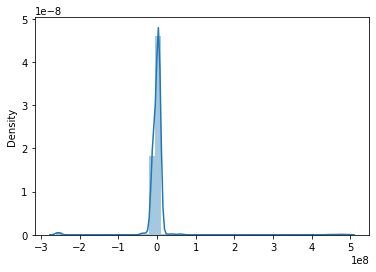

In [121]:
# distribution plot of predicted y values vs test y values
sns.distplot((y_test - y_pred), bins=50);

Text(0, 0.5, 'y_pred')

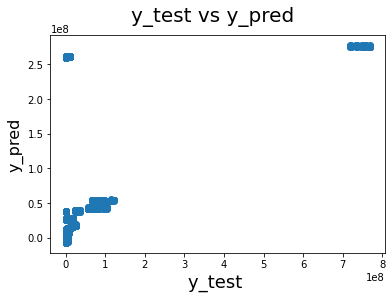

In [122]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16) 

We can see from the graph above observing the spread for y_pred and Y_test there is a couple of outliers but for the majority we can say that there is infact a moderate linear correlation. The RMSE is the standard deviation of the prediction errors also known as residuals. This helps us understand how well the actual data fits our model.

Now we will make predictions of the y variable which is crops_value using our final test model

In [ ]:
## * NORMAL DISTRIBUTION OF ERROR (TEST - PREDICTED ) *

plt.figure(figsize=(12,5))
sns.distplot((y_test-y_pred),bins=50,hist_kws=dict(edgecolor="k", linewidth=2));
plt.xlabel('y_test', fontsize='15')
plt.ylabel('y_pred', fontsize='15')
plt.title("NORMAL DISTRIBUTION OF ERROR (TEST - PREDICTED )")
plt.savefig("lr1")

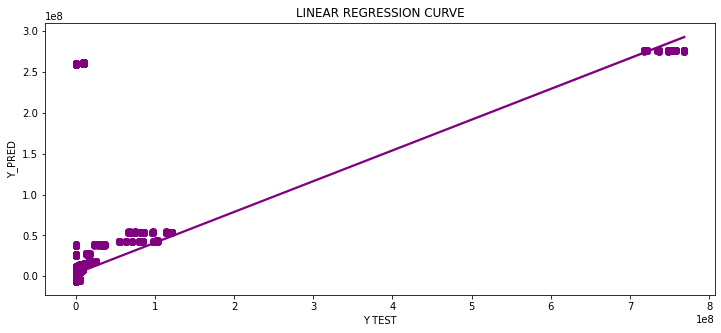

In [123]:
### LINEAR REGRESSION CURVE

plt.figure(figsize=(12,5))
sns.regplot(y_test,y_pred, df_brazildata,color='purple')
plt.xlabel("Y TEST")
plt.ylabel("Y_PRED")
plt.title("LINEAR REGRESSION CURVE")
plt.savefig("lr3")

In [124]:
# create R2 score
r2 = r2_score(y_test, y_pred)

# create Adjusted R2 Score
p = len(X_test_1.columns)
n = y_test.shape[0]
adj_r2 = 1 - (1 - r2) * ((n - 1)/(n-p-1))

# create RMSE score
rmse = mean_squared_error(y_test, y_pred, squared = False)


# print final model performance stats
print(str(p) + " Predictors in Test Set")
print(str(n) + " Records in Test Set")
print("R2: " + str(r2))
print("Adj R2: " + str(adj_r2))
print("RMSE: " + str(rmse))

95 Predictors in Test Set
25056 Records in Test Set
R2: 0.37672347857732547
Adj R2: 0.3743512322017184
RMSE: 41045956.165925846


Let's compare the R2 and Adj R2 values from the training dataset vs the test dataset.

Test Dataset R2: 0.37672347857732547 Adj R2: 0.3743512322017184


# Final Linear Model Conclusion

In [125]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 10579146.240595227
Mean Squared Error: 1684770517575106.0
Root Mean Squared Error: 41045956.165925846


MAE: A metric that tells us the mean absolute difference between the predicted values and the actual values in a dataset. The lower the MAE, the better a model fits a dataset

The lower the MSE the higher the accuracy of prediction as there would be excellent match between the actual and predicted data set

RMSE: A metric that tells us the square root of the average squared difference between the predicted values and the actual values in a dataset. The lower the RMSE, the better a model fits a dataset


In [126]:
#print the R2_Score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.37672347857732547

# Multiple Linear Regression Not using Stats Models

In [127]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)
X_train.head()

Training split input-  (58464, 108)
Testing split input-  (25056, 108)


,year,consumer_value,crops_action_Laying,crops_action_Producing Animals/Slaughtered,crops_action_Production,crops_action_Stocks,crops_action_Yield,crops_action_Yield/Carcass Weight,crops_type_Avocados,crops_type_Bananas,...,months_October,months_September,crop_measurement_1000 Head,crop_measurement_1000 No,crop_measurement_100mg/An,crop_measurement_No,crop_measurement_No/An,crop_measurement_ha,crop_measurement_hg/ha,crop_measurement_tonnes
34124,2014,92.990470,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
8184,2011,68.870890,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
75851,2019,124.141857,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
23802,2013,11.414533,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7121,2010,72.172940,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [128]:
# Training the Multiple Linear Regression model on the Training set
#This is the same code we used in Simple Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [129]:
# Predicting the Test set results
#Remember that we need to check our training results on the Test set but we can't plot a graph
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2) #we display values with only 2 decimals after the comma

In [130]:
#We calculate the precision of the model or r^2
print('The precision of the model is ')
print(regressor.score(X_train, y_train))

The precision of the model is 
0.36803252078641036


In [131]:
#We build the equation
print('a = ')
print(regressor.coef_)

print('The interception is: ')
print(regressor.intercept_)

a = 
[ 3.87e+04 -2.57e+03  3.46e+16  3.46e+16  4.37e+16  1.95e+16 -7.27e+16
  8.37e+16 -4.38e+05  2.09e+06  8.67e+04 -3.04e+05  1.87e+06  3.23e+16
 -1.10e+07 -1.10e+07 -6.29e+05 -3.20e+05 -1.09e+07  5.32e+04  1.70e+04
  7.24e+06 -5.61e+05 -5.70e+06 -3.23e+04  5.82e+05  1.15e+06 -9.43e+06
 -1.08e+07 -1.09e+07 -2.72e+05 -2.79e+05 -2.41e+05  1.62e+05 -1.06e+05
 -4.11e+05  1.23e+05 -3.77e+05  3.12e+07  1.59e+04 -7.51e+03 -1.10e+07
 -3.12e+05 -3.24e+05 -5.07e+04  2.65e+05 -1.10e+07 -1.09e+07 -1.07e+07
 -1.10e+07 -1.10e+07 -3.72e+05  2.56e+05  5.76e+06 -1.08e+07  3.86e+04
 -4.03e+05 -2.11e+05 -2.73e+05 -3.56e+05 -2.39e+05  5.62e+05  1.15e+06
 -3.46e+05  1.50e+16  2.34e+05  4.31e+06 -3.25e+06 -1.52e+05 -6.78e+05
  1.68e+06 -4.79e+05 -1.10e+07 -1.10e+07 -4.67e+05  4.05e+07 -1.28e+05
  2.59e+08 -4.34e+05 -3.41e+05  1.55e+05 -2.25e+05  1.39e+06 -2.31e+05
 -2.64e+05  4.39e+05  2.18e+06 -1.07e+07 -2.75e+05 -4.37e+05  8.25e+03
 -2.03e+05 -3.43e+05 -3.09e+05  1.12e+05  1.63e+05  2.60e+04  1.48e+05
 

# Ridge Regression - Model 2

In [132]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

We will first train our first ridge regression model by setting to 1. This is the equivalent of running ordinary least squares regression with no penalty. Note that Scikit confusingly names the lambda parameter as alpha.


In [133]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.4f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.4f}".format(ridge.score(X_test, y_test)))

Training set score: 0.3680
Test set score: 0.3341


In [134]:
# alpha = 10
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.37
Test set score: 0.33


# Model 4 Decision Tree Regression

In [136]:
#Reading in brazildmodels cleaned dataset
df_brazildata = pd.read_csv('df_brazilmodels.csv')

In [137]:
#Dropping the below 3 columns from our regression
df_brazildata.drop('months', axis=1, inplace=True)
df_brazildata.drop('country', axis=1, inplace=True)
df_brazildata.drop('Unnamed: 0', axis=1, inplace=True)
df_brazildata.drop('crop_measurement', axis=1, inplace=True)
df_brazildata.drop('crops_action', axis=1, inplace=True)
df_brazildata.drop('crops_type', axis=1, inplace=True)

In [138]:
# inspect brazil data df with added dummy variables
df_brazildata.head(5)

,year,crop_value,consumer_value
0,2010,5.333023e+06,3.559127
1,2010,5.333023e+06,4.098498
2,2010,5.333023e+06,4.271629
3,2010,5.333023e+06,4.338587
4,2010,5.333023e+06,5.074611


In [139]:
# set the target variable

X = df_brazildata.iloc[:, 0:3].values
y = df_brazildata.iloc[:, 2].values
# set the independent predictor variables

In [140]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [141]:
# splitting the dataaset into Training and Testing Data 
from sklearn.model_selection import train_test_split

# random state is 0 and test size if 30%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=0)#70 Training and 30 Test
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (58464, 3)
Testing split input-  (25056, 3)


Once we split the data, the next step is to scale our dataset so the extreme values will not have too much effect on the prediction of our model. Notice that we are only scaling the input values, not the output ones. Now, our data is ready for training the model using a decision tree algorithm


# Fitting the model using Standard Scaler


In [ ]:
# importing standard scalling method from sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# providing the inputs for the scalling purpose
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)